# KMeans实现图像分割

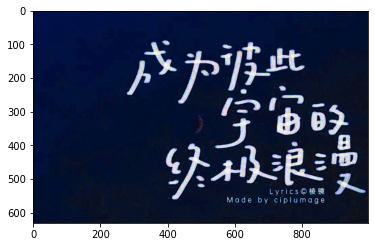

In [22]:
#图像的加载与展示
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as io
img = io.imread('IMG_8082_polarr.JPEG')
plt.imshow(img)

In [23]:
#查看数据结果与维度
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(631, 996, 3)


In [24]:
#查看数据内容
print(img)

[[[ 1 15 76]
  [ 1 15 76]
  [ 1 15 76]
  ...
  [ 0 14 49]
  [ 0 14 49]
  [ 0 14 49]]

 [[ 1 15 76]
  [ 1 15 76]
  [ 1 15 76]
  ...
  [ 0 14 49]
  [ 0 14 49]
  [ 0 14 49]]

 [[ 1 15 76]
  [ 1 15 76]
  [ 1 15 76]
  ...
  [ 0 14 49]
  [ 0 14 49]
  [ 0 14 49]]

 ...

 [[ 5 17 43]
  [ 5 16 44]
  [ 5 16 44]
  ...
  [ 9 15 31]
  [ 9 15 31]
  [ 9 15 31]]

 [[ 5 17 41]
  [ 5 17 43]
  [ 5 17 43]
  ...
  [ 9 15 31]
  [ 9 15 31]
  [ 9 15 31]]

 [[ 6 16 41]
  [ 6 16 41]
  [ 6 16 43]
  ...
  [ 8 14 30]
  [ 8 14 30]
  [ 8 14 30]]]


In [25]:
#维度存储
img_width = img.shape[1]
img_height = img.shape[0]
print(img_width,img_height)

996 631


In [26]:
#数据维度转化
img_data = img.reshape(-1,3)
print(img.shape,img_data.shape)
print(img_data)

(631, 996, 3) (628476, 3)
[[ 1 15 76]
 [ 1 15 76]
 [ 1 15 76]
 ...
 [ 8 14 30]
 [ 8 14 30]
 [ 8 14 30]]


In [27]:
#X赋值
X = img_data

In [28]:
#模型建立与训练
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [29]:
#聚类结果预测
label = model.predict(X)
print(label)
import pandas as pd
print(pd.value_counts(label))

[0 0 0 ... 0 0 0]
0    567591
1     49726
2     11159
dtype: int64


In [30]:
#结果数据的维度转化
label = label.reshape([img_height,img_width])
print(label)
print(label.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(631, 996)


In [31]:
#后续的灰度处理
label = 1/(label+1)
print(label)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


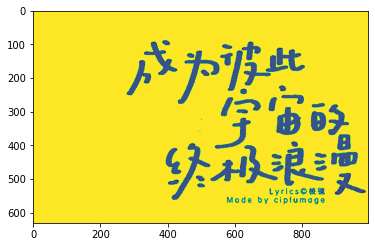

In [32]:
#结果的可视化
plt.imshow(label)

In [33]:
#图像存储到本地
io.imsave('3.png',label)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


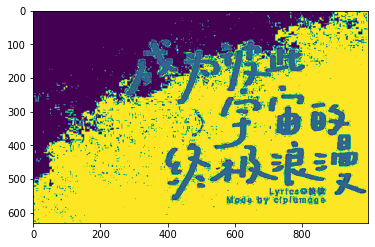

In [36]:
model = KMeans(n_clusters=4,random_state=0)
model.fit(X)
label = model.predict(X)
#结果数据的维度转化
label = label.reshape([img_height,img_width])
#后续的灰度处理
label = 1/(label+1)
#结果的可视化
plt.imshow(label)
#图像存储到本地
io.imsave('4.png',label)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


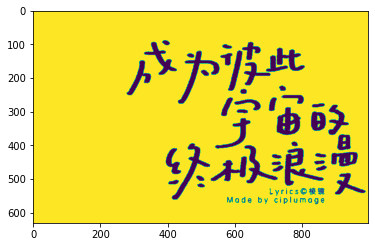

In [35]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(X)
label = model.predict(X)
#Dim conv
label = label.reshape([img_height,img_width])
#Gray scale 0~1
label = 1/(label+1)
#visualization
plt.imshow(label)
io.imsave('2.png',label)

![materials](materials2.png)